## Assignment - Logistic Regression - Bank Data

## Business Problem / Objective
**Our aim is classify customers who have subscribed for Fixed Deposit(FD) and predict the customers who will take the FD based on the given attributes of the customer.**

In [1]:
import pandas as pd
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
masterData = pd.read_csv('bank-full.csv',sep=';') # Read the data and display the data for integrity
masterData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
masterData.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
import numpy as np

### Checking the unique values in each columns

In [5]:
# Display the categories with unique values less than 10 else show the count of unique values


for x in masterData.columns:
    if len(np.unique(masterData[x])) <= 10:
        print(f'Number of unique vals in {x} - {len(np.unique(masterData[x]))} --->',np.unique(masterData[x]))
    else:
        print(f'Number of unique vals in {x} - {len(np.unique(masterData[x]))}')

Number of unique vals in age - 77
Number of unique vals in job - 12
Number of unique vals in marital - 3 ---> ['divorced' 'married' 'single']
Number of unique vals in education - 4 ---> ['primary' 'secondary' 'tertiary' 'unknown']
Number of unique vals in default - 2 ---> ['no' 'yes']
Number of unique vals in balance - 7168
Number of unique vals in housing - 2 ---> ['no' 'yes']
Number of unique vals in loan - 2 ---> ['no' 'yes']
Number of unique vals in contact - 3 ---> ['cellular' 'telephone' 'unknown']
Number of unique vals in day - 31
Number of unique vals in month - 12
Number of unique vals in duration - 1573
Number of unique vals in campaign - 48
Number of unique vals in pdays - 559
Number of unique vals in previous - 41
Number of unique vals in poutcome - 4 ---> ['failure' 'other' 'success' 'unknown']
Number of unique vals in y - 2 ---> ['no' 'yes']


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

### Using the count plot to check the relation of cateforical variable with our Dependent variable

    ***First check the distribution of our Dependent Variable

<AxesSubplot:xlabel='y', ylabel='count'>

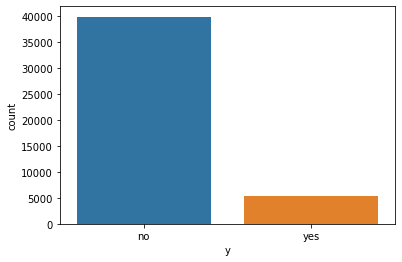

In [7]:
sns.countplot(x=masterData['y'], data = masterData)

***This is a very biased data out of 45211 number of observations approximately only 5000 are yes which makes the probability of such occurance 5000 / 45211 = 11% of the total data set is in favour of the interested event. it is very difficlut to build a efficient model in this scenario, without modifying the threshold in the model. which is out of scope for now.***

### </n>Let us check the correlation of our categorical variable with  the dependent variable.</n>

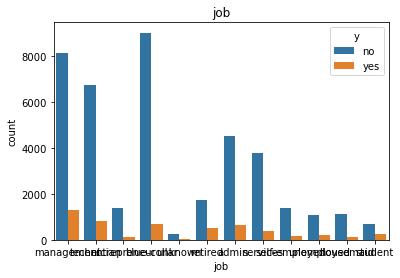

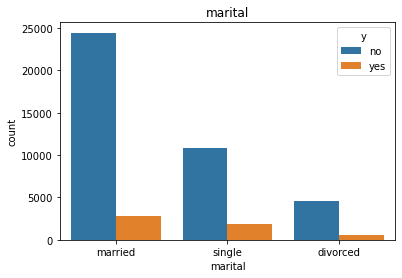

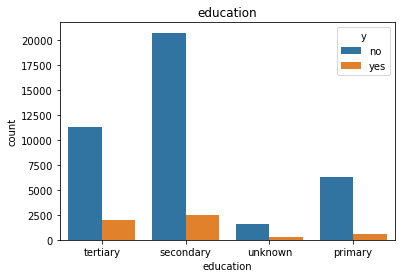

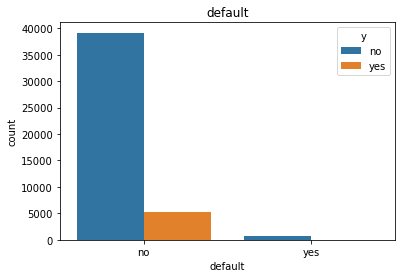

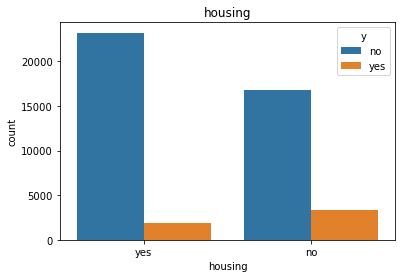

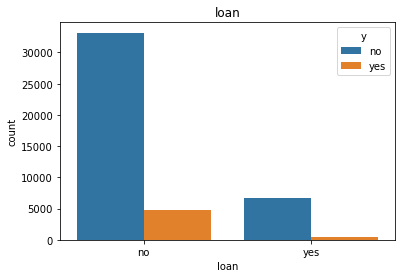

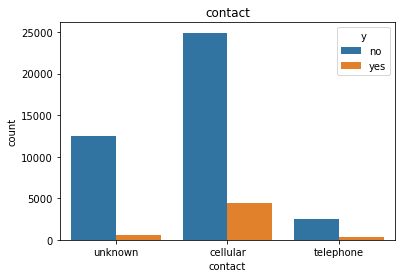

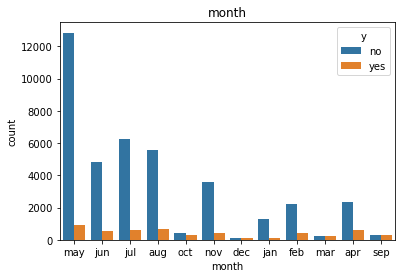

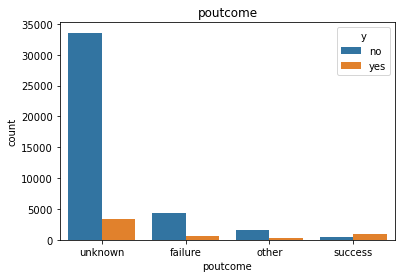

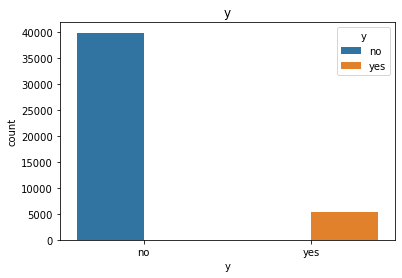

In [8]:
Cat_Var = [feature for feature in masterData.columns if masterData[feature].dtypes == 'O']
Cat_Var
for feature in Cat_Var:
    sns.countplot(x=masterData[feature], data=masterData, hue='y')
    plt.title(feature)
    plt.show()

***There is a reasonalbe distribution of 'Y' and 'N' among all categorical variables. let us see how to use them in regression.***

### Coverting categorical variables into numerical using get_dummies

In [9]:
EDA_Data = masterData.copy(deep=True) # creating a copy of EDA
print(EDA_Data.shape)
EDA_Data.drop('y',axis=1,inplace = True) #segregating dependent and independent variables

(45211, 17)


### one hot coding for all independent variables

In [10]:
edaData = pd.get_dummies(EDA_Data)
edaData.shape

(45211, 51)

### Converting y column into integer type - 1 = 'no' , 0 = 'yes'

In [11]:
y = masterData['y'].copy(deep=True)
y[y == 'no'] = 1
y[y == 'yes'] = 0
y

0        1
1        1
2        1
3        1
4        1
        ..
45206    0
45207    0
45208    0
45209    1
45210    1
Name: y, Length: 45211, dtype: object

In [12]:
print(y.value_counts())
print(y.dtypes)
y = y.astype(int) # Changing our 'y' column from object to int.
print(y.dtypes)

1    39922
0     5289
Name: y, dtype: int64
object
int32


In [13]:
edaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin.           45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

In [20]:
edaDataMaster = edaData.copy(deep=True) ## Making a master copy for backup

### Feature selection using SKLEARN.FEATURE_SELECTION.RFE

In [39]:
from sklearn.feature_selection import RFE

In [71]:
lg_reg = LogisticRegression(max_iter=10000)
rfe_fit = RFE(lg_reg,n_features_to_select=10).fit(edaData,y)

In [72]:
rfe_fit.ranking_

array([35, 37, 33, 34, 24, 36, 32, 26, 31,  7, 27,  8, 30,  3, 28, 17, 23,
       29, 10, 25, 19, 16, 18, 20,  1, 11, 15,  6,  9, 12,  1, 22,  1,  1,
        5,  1,  1, 21,  1,  4,  2,  1,  1, 13,  1, 14])

In [73]:
rfeSelCol = pd.DataFrame(rfe_fit.ranking_,index=edaData.columns,columns=['Ranking']).sort_values(by='Ranking',ascending=True)

In [81]:
ColToSelect = [x for x , y in enumerate(rfe_fit.ranking_) if y == 1]

In [86]:
rfeEdaData = edaData.iloc[:,ColToSelect]

In [97]:
X = rfeEdaData.copy(deep=True) # converting edaData into X data. for convinience
print(X.shape)
print(y.shape)

(45211, 10)
(45211,)


### Feature selectino using entropy  - information gain.

In [88]:
# from sklearn.tree import DecisionTreeClassifier

In [89]:
# dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=10) # fitting the feature section function using 
# dt.fit(edaData,y)                                                               # entropy - information gain.

***Creating the two lists with feature name (fi_Col) and feature importance score (fimp). So that we can sort the feature importance score. Then we can select the features with highest importance score / information gain score***

In [87]:
# fi_Col = []
# fimp = []
# for i,column in enumerate(edaData):
#     print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
#     fi_Col.append(column)
#     fimp.append(dt.feature_importances_[i])

In [90]:
# fimp_df = pd.DataFrame({'Feature':fi_Col,'FeatureImp':fimp}) ## creating the data frame using the two lists
# fimp_df.head()

In [94]:
# fimp_df = fimp_df.sort_values("FeatureImp", ascending=False).reset_index() ## sorting the dataframe for Feature imp column
# fimp_df.head()

In [93]:
# col_to_drop = fimp_df.Feature[46:] # col_to_drop with columns whose information gain score '0'
# col_to_drop

In [134]:
# edaData.drop(col_to_drop,axis=1,inplace=True) ## drop columns in the col_to_drop list
# edaData.shape

In [96]:
# X = edaData.copy(deep=True) # converting edaData into X data. for convinience
# print(X.shape)
# print(y.shape)

## Model building

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
from sklearn.model_selection import train_test_split

#### Train Test and Validation Split (70,20,10)

In [100]:
# first split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2, random_state=15)

# second split
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,train_size = 0.9, test_size = 0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(32551, 10)
(9043, 10)
(3617, 10)
(32551,)
(9043,)
(3617,)


<AxesSubplot:xlabel='y', ylabel='count'>

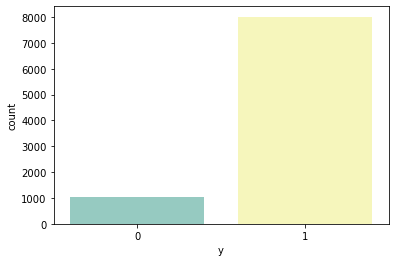

In [101]:
sns.countplot(x=y_test,palette='Set3') # Verifying the distribution of Train Test Validatin split

<AxesSubplot:xlabel='y', ylabel='count'>

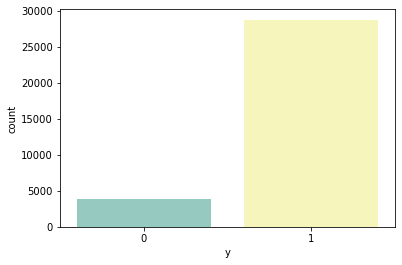

In [102]:
sns.countplot(x=y_train,palette='Set3')

<AxesSubplot:xlabel='y', ylabel='count'>

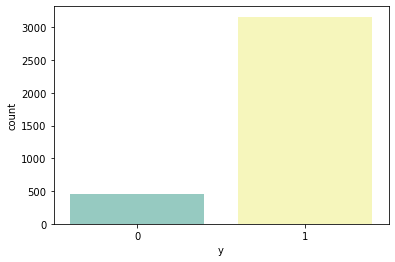

In [103]:
sns.countplot(x=y_valid,palette='Set3')

We don't observe any bias in our spilt.

### Create Regression model

In [107]:
logi_reg = LogisticRegression(random_state=0,class_weight='balanced',max_iter=10000)
# logi_reg = LogisticRegression(max_iter=5000)
logi_reg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=0)

#### Getting Probabilities, Predictions and Coefs from logistic regression model

In [108]:
logi_reg.predict(X_train)
y_pred = logi_reg.predict(X_train)

pred_proba = logi_reg.predict_proba(X_train)

print(pred_proba)

logi_reg.coef_

[[0.61038606 0.38961394]
 [0.44716818 0.55283182]
 [0.44716818 0.55283182]
 ...
 [0.20873583 0.79126417]
 [0.46337264 0.53662736]
 [0.20873583 0.79126417]]


array([[-0.59570768,  1.18579004,  0.66105435, -1.17525579,  0.74013256,
         0.59705278, -1.63310171, -1.37092062, -1.24830921, -2.38237938]])

#### Checking the accuracy of the model

In [109]:
# Accuracy on Train
print("The Training Accuracy is: ", logi_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is : ", logi_reg.score(X_test, y_test))

from sklearn.metrics import classification_report
# Classification Report
print('Classification Report')
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.8208657184111087
The Testing Accuracy is :  0.8246157248700653
Classification Report
              precision    recall  f1-score   support

           0       0.33      0.52      0.40      3805
           1       0.93      0.86      0.89     28746

    accuracy                           0.82     32551
   macro avg       0.63      0.69      0.65     32551
weighted avg       0.86      0.82      0.84     32551



In [110]:
from sklearn.metrics import confusion_matrix ## CONFUSION METRICS
confusion_matrix(y_train,y_pred).

array([[ 1981,  1824],
       [ 4007, 24739]], dtype=int64)

In [111]:
y_train.value_counts()

1    28746
0     3805
Name: y, dtype: int64

In [130]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
cm = confusion_matrix(y_train,y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

def plot_confustion_matrix(cm,classes,title="Confusion Matrix"):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0.,vmax=1.,annot=True,annot_kws={'size':20})
    else:
        sns.heatmap(cm,vmax=1.,vmin=0.)
    plt.title(title)
    plt.ylabel('True lable')
    plt.xlabel('Predicted Lable')

array([[ 1981,  1824],
       [ 4007, 24739]], dtype=int64)

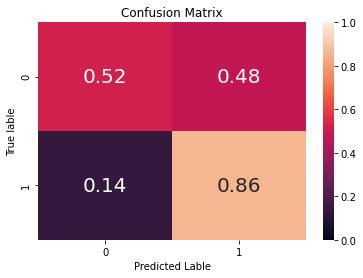

In [133]:
plot_confustion_matrix(cm_norm,logi_reg.classes_)
cm

#### PRECISION, SPECIFICITY AND RECALL/SENSITIVITY 

In [157]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is : {:.2f} ".format(TPR[0]))

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is          : {:.2f} ".format(PPV[0]))

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is: {:.2f} ".format(FPR[0]))

# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: {:.2f} ".format(FNR[0]))

The True Positive Rate is : 0.52 
The Precision is          : 0.33 
The False positive rate is: 0.14 
The False Negative Rate is: 0.48 

The average TPR is: 0.6906187210597912
The average Precision is: 0.6310806902866959
The average False positive rate is: 0.30938127894020884
The average False Negative Rate is: 0.30938127894020884


In [150]:
# precision = TP/TP+FP (accuracy of positive predictions out of total predicted positivies - prositive predictive value)
precision = 1981/(1981+4007)
# recall / sensitivity = TP/TP+FN (accuracy of positive prediction out of total actual positives - true positive rate)
recall = 1981 / (1981+1824)
# specificity = TN /TN+FP (coverage of actual negetive sample meaning how many true negetives are correctly predicted)
specificity = 24739/(24739+4007)
print(f'Precision-{precision:.2f}\nRecall-{recall:.2f}\nSpecificity-{specificity:.2f}')
# False positive rate is the rate of wrong positives predicted out of total actual negatives - inverse of specificity
# FPR = FP / FP+TN
print(F"FPR = ", 4007/(4007+24739),1-specificity)
# FNR(False Negetive Rate) = FN/(FN+TP)
print('FNR = ', 1824/(1824+1981))
cm

Precision-0.33
Recall-0.52
Specificity-0.86
FPR =  0.13939330689487234 0.13939330689487228
FNR =  0.47936925098554534


array([[ 1981,  1824],
       [ 4007, 24739]], dtype=int64)

**We are interested in prediction TP as that is our classification problem we need to identify customers who took the FD correctly. Our model is correctly predicting the customer who have not taken the FD but it prdiction for customers who have taken the FD is as low as 0.52. Technically this is a useless model.***

## ROC Curve

In [158]:
from sklearn.metrics import roc_curve, roc_auc_score

In [159]:
pred_proba = pd.DataFrame(pred_proba)
pred_proba

,0,1
0,0.610386,0.389614
1,0.447168,0.552832
2,0.447168,0.552832
3,0.610386,0.389614
4,0.463373,0.536627
...,...,...
32546,0.463373,0.536627
32547,0.322168,0.677832
32548,0.208736,0.791264
32549,0.463373,0.536627


Text(0, 0.5, 'True Positive Rate')

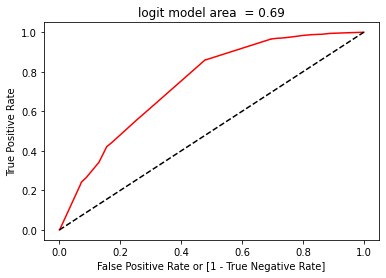

In [160]:
fpr,tpr,threshold = roc_curve(y_train, logi_reg.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred)

plt.plot(fpr, tpr, color='red', label = f'logit model area  = {auc}')
plt.title(f'logit model area  = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Applying logarithamic loss or log loss function to calculate parameter C (Inverse Regularization Strength) 

In [161]:
from sklearn.metrics import log_loss

In [164]:
C_List = np.geomspace(1e-5, 1e5, num=50)
CA = []
logarithamic_loss = []

for c in C_List:
    logi_reg1 = LogisticRegression(random_state=0,class_weight='balanced',max_iter=5000,C=c)
    logi_reg1.fit(X_train,y_train)
    score = logi_reg1.score(X_test,y_test)
    CA.append(score)
    print( f'The mean accuracy CA of parameter {c} is {score:.2f}')
    pred_proba_test = logi_reg1.predict_proba(X_test)
    logLoss1 = log_loss(y_test,pred_proba_test)
    logarithamic_loss.append(logLoss1)
    print(f"The log loss of C parameter is {c} is {logLoss1} \n")  

The mean accuracy CA of parameter 1e-05 is 0.68
The log loss of C parameter is 1e-05 is 0.6905223260273574 

The mean accuracy CA of parameter 1.5998587196060572e-05 is 0.68
The log loss of C parameter is 1.5998587196060572e-05 is 0.6890138334273874 

The mean accuracy CA of parameter 2.559547922699533e-05 is 0.68
The log loss of C parameter is 2.559547922699533e-05 is 0.6866943782072629 

The mean accuracy CA of parameter 4.094915062380427e-05 is 0.68
The log loss of C parameter is 4.094915062380427e-05 is 0.6832150514193598 

The mean accuracy CA of parameter 6.55128556859551e-05 is 0.68
The log loss of C parameter is 6.55128556859551e-05 is 0.6781541380539602 

The mean accuracy CA of parameter 0.00010481131341546853 is 0.68
The log loss of C parameter is 0.00010481131341546853 is 0.6711302184190899 

The mean accuracy CA of parameter 0.00016768329368110083 is 0.68
The log loss of C parameter is 0.00016768329368110083 is 0.6619588097169476 

The mean accuracy CA of parameter 0.00026

In [169]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(50,)
logarithmic_loss2 = np.array(logarithamic_loss).reshape(50,)

# zip
outcomes = zip(C_List, CA2, logarithmic_loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
# df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,21,0.193070,0.824837,0.574404
1,20,0.120679,0.824837,0.574409
2,22,0.308884,0.824616,0.574416
3,23,0.494171,0.824616,0.574428
4,24,0.790604,0.824616,0.574450
5,25,1.264855,0.824616,0.574458
6,26,2.023590,0.824616,0.574469
7,28,5.179475,0.824616,0.574474
8,27,3.237458,0.824616,0.574476
9,29,8.286428,0.824616,0.574479


In [170]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=0, shuffle=True)

In [184]:
# Logistic Regression CV
logi_reg3 = LogisticRegressionCV(random_state=0,class_weight='balanced',Cs=C_List,max_iter=5000)
logi_reg3.fit(X_train,y_train)
print ("The CA is                       : ", logi_reg3.score(X_test,y_test))
pred_proba_tCV = logi_reg3.predict_proba(X_test)
logarthmic_loss3 = log_loss(y_test,pred_proba_tCV)
print("The log loss or logistic loss is :", logarthmic_loss3)

print("The optimal c parameter is       :", logi_reg3.C_)

The CA is                       :  0.8250580559548822
The log loss or logistic loss is : 0.5753402996130669
The optimal c parameter is       : [0.029471]


### Final model with selected parameters after hyper parameter tuning

In [193]:
final_model = LogisticRegression(random_state=0,class_weight='balanced',max_iter=5000,C=0.193)
final_model.fit(X_train,y_train)

LogisticRegression(C=0.193, class_weight='balanced', max_iter=5000,
                   random_state=0)

In [194]:
Score = final_model.score(X_valid,y_valid)
pred_proba_valid = final_model.predict_proba(X_valid)
logarthmic_loss4 = log_loss(y_valid,pred_proba_valid)

print('Validity Accuracy : ', Score)
print('log loss is       : ', logarthmic_loss4)

Validity Accuracy :  0.8153165606856511
log loss is       :  0.5773271966468511


Text(0, 0.5, 'True Positive Rate')

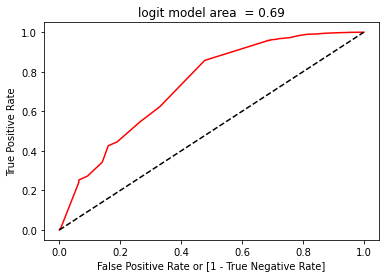

In [195]:
y_pred_valid = final_model.predict(X_valid)
fpr,tpr,threshold = roc_curve(y_valid, final_model.predict_proba(X_valid)[:,1])

auc = roc_auc_score(y_valid,y_pred_valid)

plt.plot(fpr, tpr, color='red', label = f'logit model area  = {auc}')
plt.title(f'logit model area  = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [196]:
print(classification_report(y_valid,y_pred_valid))

              precision    recall  f1-score   support

           0       0.35      0.52      0.42       455
           1       0.93      0.86      0.89      3162

    accuracy                           0.82      3617
   macro avg       0.64      0.69      0.65      3617
weighted avg       0.85      0.82      0.83      3617



In [197]:
confusion_matrix(y_valid,y_pred_valid)

array([[ 238,  217],
       [ 451, 2711]], dtype=int64)